In [57]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline
sns.set_style('darkgrid')

<h2><center><font color='red'>Loading the Data</font></center></h2>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f"Number of Training Images = {x_train.shape[0]}")
print(f"Number of Testing Images = {x_test.shape[0]}")

Number of Training Images = 60000
Number of Testing Images = 10000


<center>60000 Training Images and 10000 Testing Images</center>

<h2><center><font color='red'>Normalization of Image</font></center></h2>

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train/255
x_test = x_test/255

<h2><center><font color='red'>Checking Unique Values for the Target</font></center></h2>

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

T-shirt/Top - 0<br>
Trouser - 1<br>
Pullover - 2<br>
Dress - 3<br>
Coat - 4<br>
Sandal - 5<br>
Shirt - 6<br>
Sneaker - 7<br>
Bag - 8<br>
Ankle boot - 9<br>

In [6]:
labels = {0:'T-shirt/Top',
          1:'Trouser',
          2:'Pullover',
          3:'Dress',
          4:'Coat',
          5:'Sandal',
          6:'Shirt',
          7:'Sneaker',
          8:'Bag',
          9:'Ankle boot',}

<h2><center><font color='red'>Visualization of The Data and The Labels</font></center></h2>

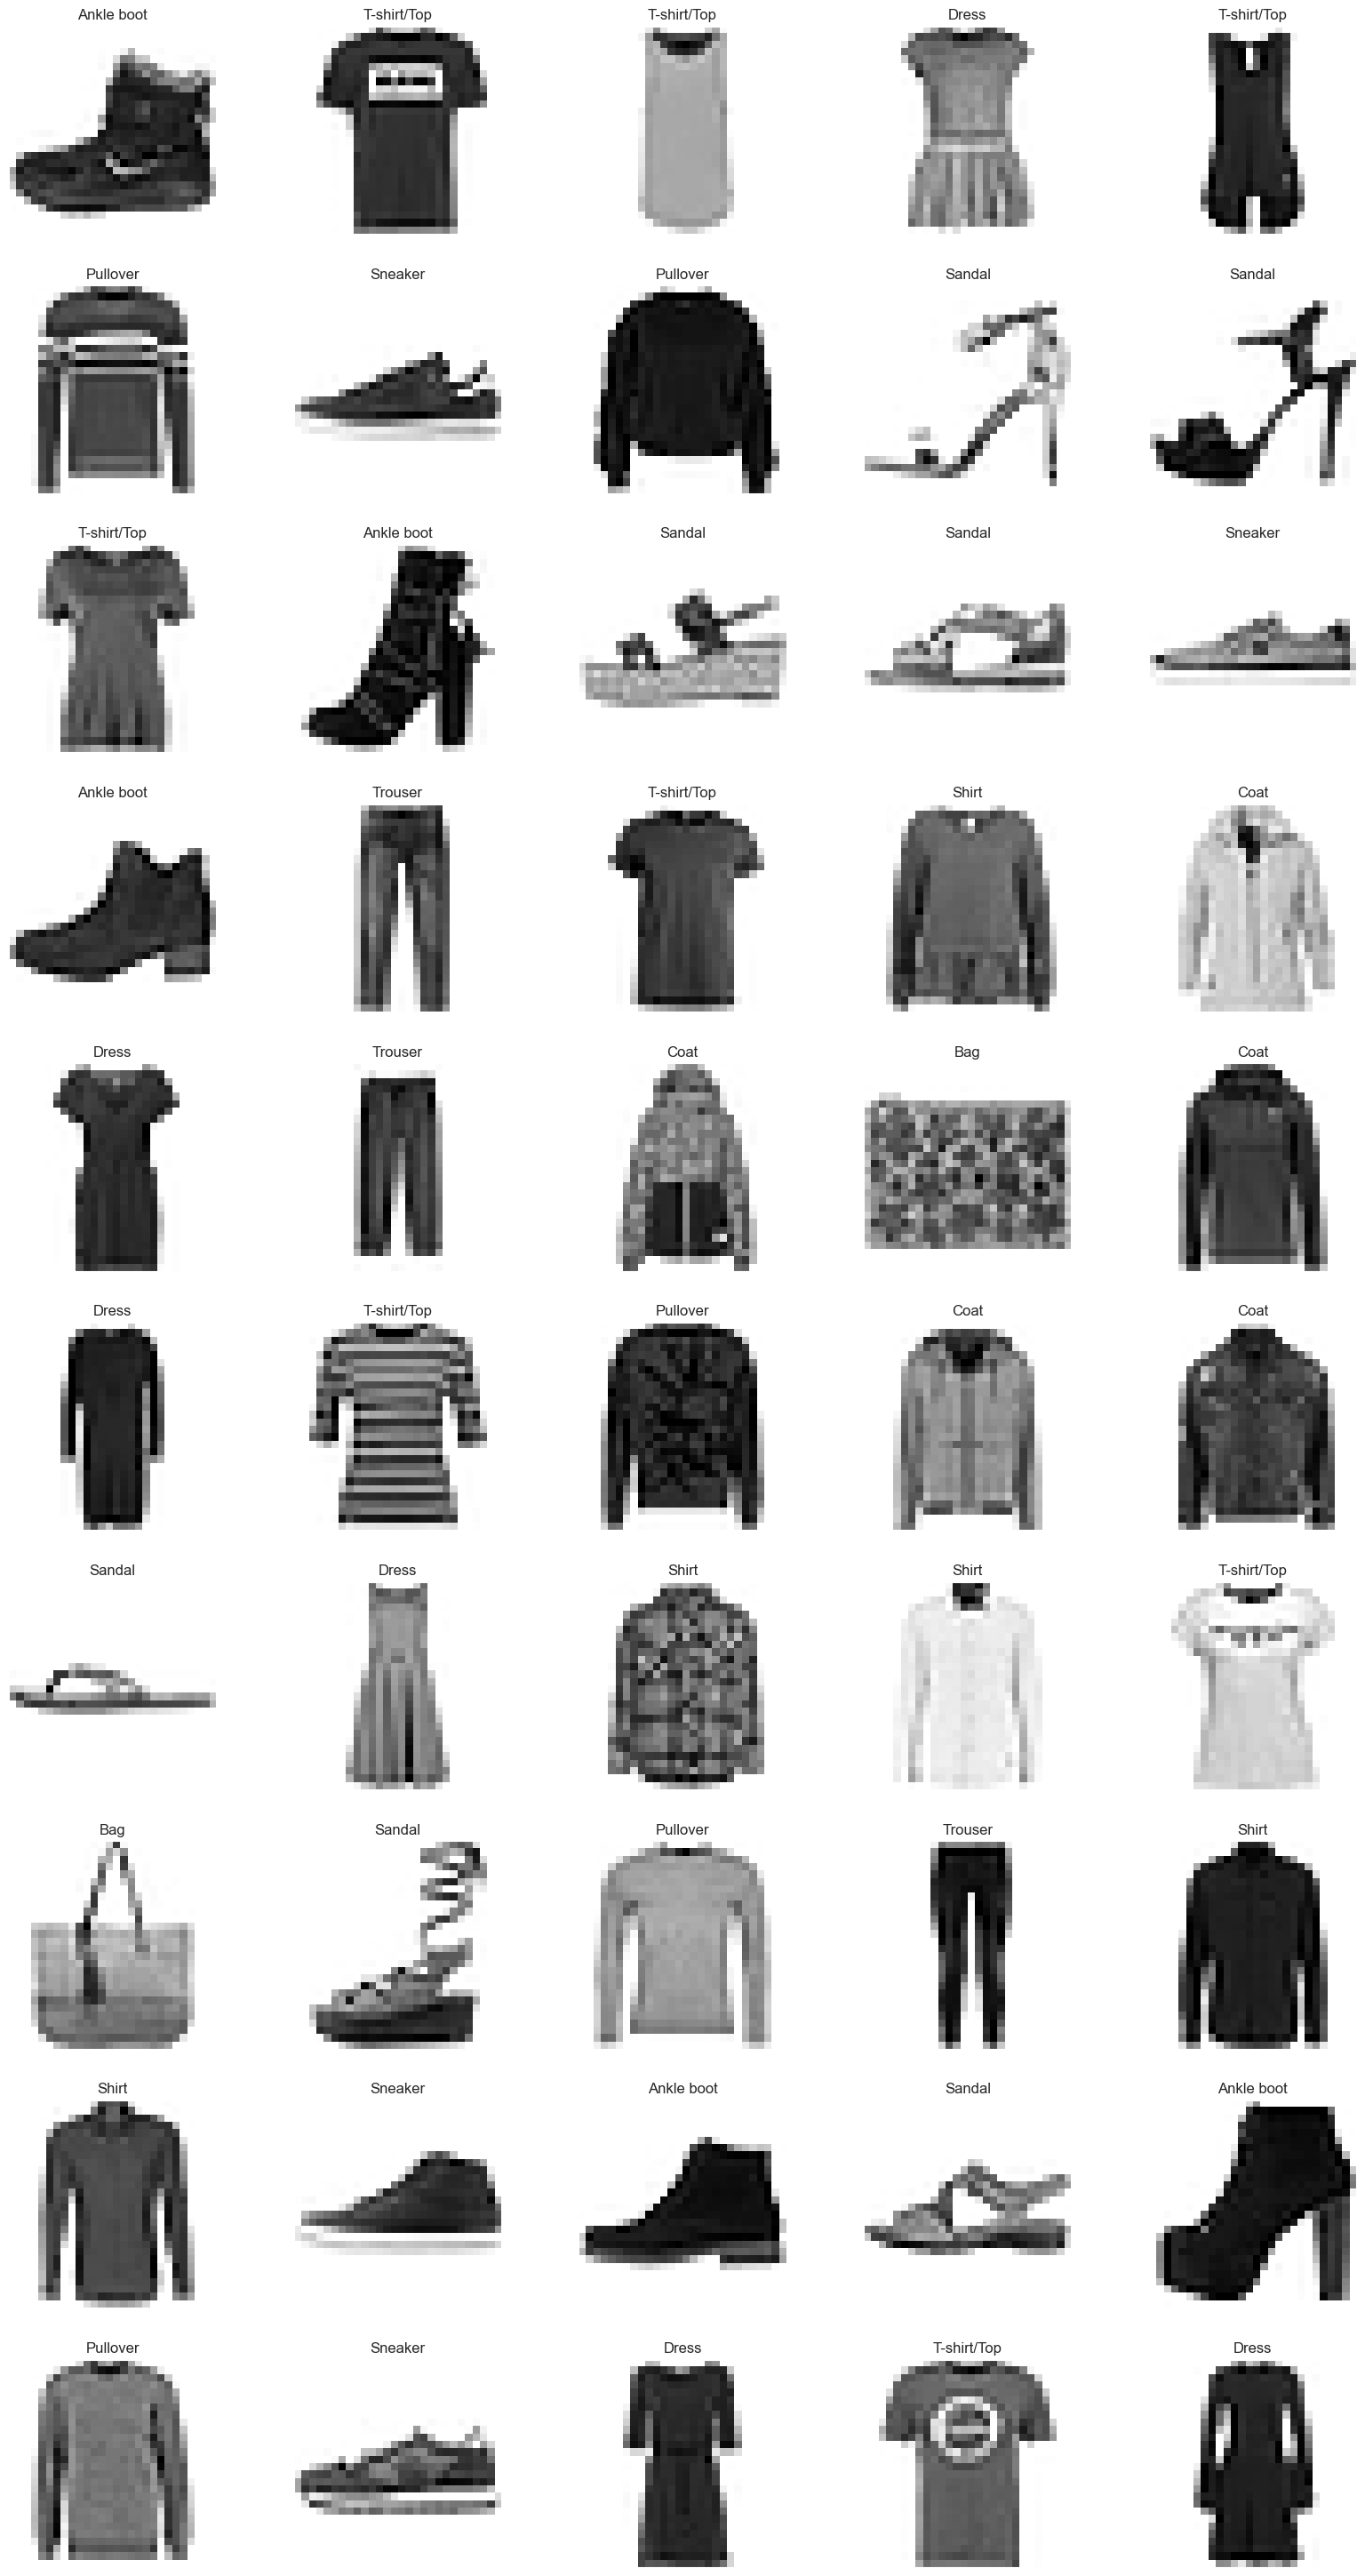

In [54]:
i = 1

plt.figure(figsize=(20, 75))
plt.subplots_adjust(hspace=0.25)
for x, y in zip(x_train[:50], y_train[:50]):

    plt.subplot(20, 5, i)
     
    plt.imshow(x, cmap='binary')
    plt.title(labels[y])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    i+=1

plt.show()

In [8]:
#0.9302
#
#model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation=tf.nn.relu, strides=1),
#                             tf.keras.layers.MaxPool2D(2, 2, padding='SAME'),
#                             tf.keras.layers.Dropout(0.3),
#                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, strides=1),
#                             tf.keras.layers.Dropout(0.3),
#                             tf.keras.layers.MaxPool2D(2, 2, padding='SAME'),
#                             tf.keras.layers.Flatten(),
#                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
#                             tf.keras.layers.Dropout(0.45),
#                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                             tf.keras.layers.Dropout(0.55),
#                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
#
#model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [9]:
# 0.9328

#model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation=tf.nn.relu, strides=1),
#                             tf.keras.layers.MaxPool2D(2, 2, padding='SAME'),
#                             tf.keras.layers.Dropout(0.3),
#                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, strides=1),
#                             tf.keras.layers.Dropout(0.3),
#                             tf.keras.layers.MaxPool2D(2, 2, padding='SAME'),
#                             tf.keras.layers.Flatten(),
#                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
#                             tf.keras.layers.Dropout(0.45),
#                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                             tf.keras.layers.Dropout(0.55),
#                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
#
#model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()
#
#history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001*0.9**x, verbose=0)])

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation=tf.nn.relu, strides=1),
                             tf.keras.layers.MaxPool2D(2, 2, padding='SAME'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, strides=1),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.MaxPool2D(2, 2, padding='SAME'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.45),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.55),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [11]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001*0.9**x, verbose=0)])

Epoch 1/50


1688/1688 [==============================] - 54s 30ms/step - loss: 0.6632 - accuracy: 0.7592 - val_loss: 0.3628 - val_accuracy: 0.8630 - lr: 0.0010
Epoch 2/50
1688/1688 [==============================] - 51s 30ms/step - loss: 0.4130 - accuracy: 0.8556 - val_loss: 0.2959 - val_accuracy: 0.8897 - lr: 9.0000e-04
Epoch 3/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.3520 - accuracy: 0.8783 - val_loss: 0.2769 - val_accuracy: 0.8947 - lr: 8.1000e-04
Epoch 4/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.3233 - accuracy: 0.8879 - val_loss: 0.2779 - val_accuracy: 0.8990 - lr: 7.2900e-04
Epoch 5/50
1688/1688 [==============================] - 50s 29ms/step - loss: 0.2947 - accuracy: 0.8966 - val_loss: 0.2474 - val_accuracy: 0.9097 - lr: 6.5610e-04
Epoch 6/50
1688/1688 [==============================] - 50s 29ms/step - loss: 0.2776 - accuracy: 0.9014 - val_loss: 0.2432 - val_accuracy: 0.9093 - lr: 5.9049e-04
Epoch 7/50
1688/1688 [==

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2144 - accuracy: 0.9316


[0.21435058116912842, 0.9315999746322632]

In [13]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_pred = [labels[x] for x in y_pred]
y_test = [labels[x] for x in y_test]

313/313 [==============================] - 2s 6ms/step


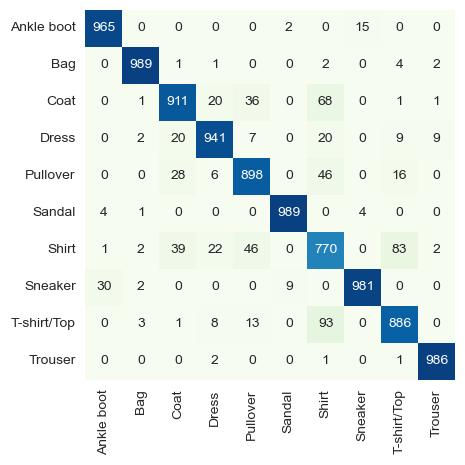

In [14]:
sns.heatmap(pd.crosstab(y_pred, y_test), annot=True, fmt="d", cmap='GnBu', cbar=False, square=True)
plt.xlabel("")
plt.ylabel("")
plt.show()

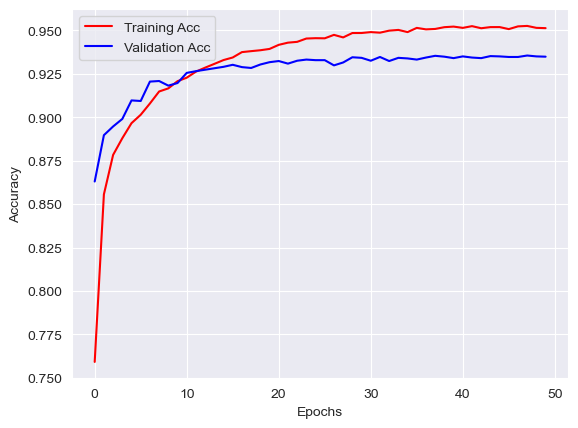

In [56]:
sns.lineplot(history.history['accuracy'], color='red', label='Training Acc')
sns.lineplot(history.history['val_accuracy'], color='blue', label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

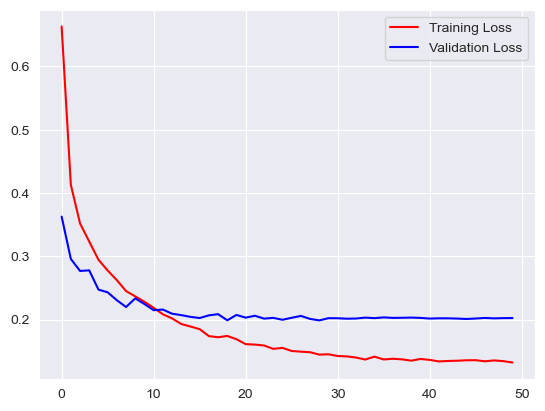

In [16]:
sns.lineplot(history.history['loss'], color='red', label='Training Loss')
sns.lineplot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.legend(loc='best')
plt.show()

In [17]:
#LAYERED VIEW OF THE NEURAL NETWORK ARCHITECTURE

#from tensorflow.keras import layers
#from collections import defaultdict
#
#color_map = defaultdict(dict)
#color_map[layers.Conv2D]['fill'] = '#FFFF00'
#color_map[layers.MaxPooling2D]['fill'] = '#FF0000'
#color_map[layers.Dropout]['fill'] = '#5C4033'
#color_map[layers.Dense]['fill'] = '#5A5A5A'
#color_map[layers.Flatten]['fill'] = '#00008B'
#
#visualkeras.layered_view(model, color_map=color_map, spacing=15,background_fill='#FFFFFF').show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Ankle boot       0.98      0.96      0.97      1000
         Bag       0.99      0.99      0.99      1000
        Coat       0.88      0.91      0.89      1000
       Dress       0.93      0.94      0.94      1000
    Pullover       0.90      0.90      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.77      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
 T-shirt/Top       0.88      0.89      0.88      1000
     Trouser       1.00      0.99      0.99      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



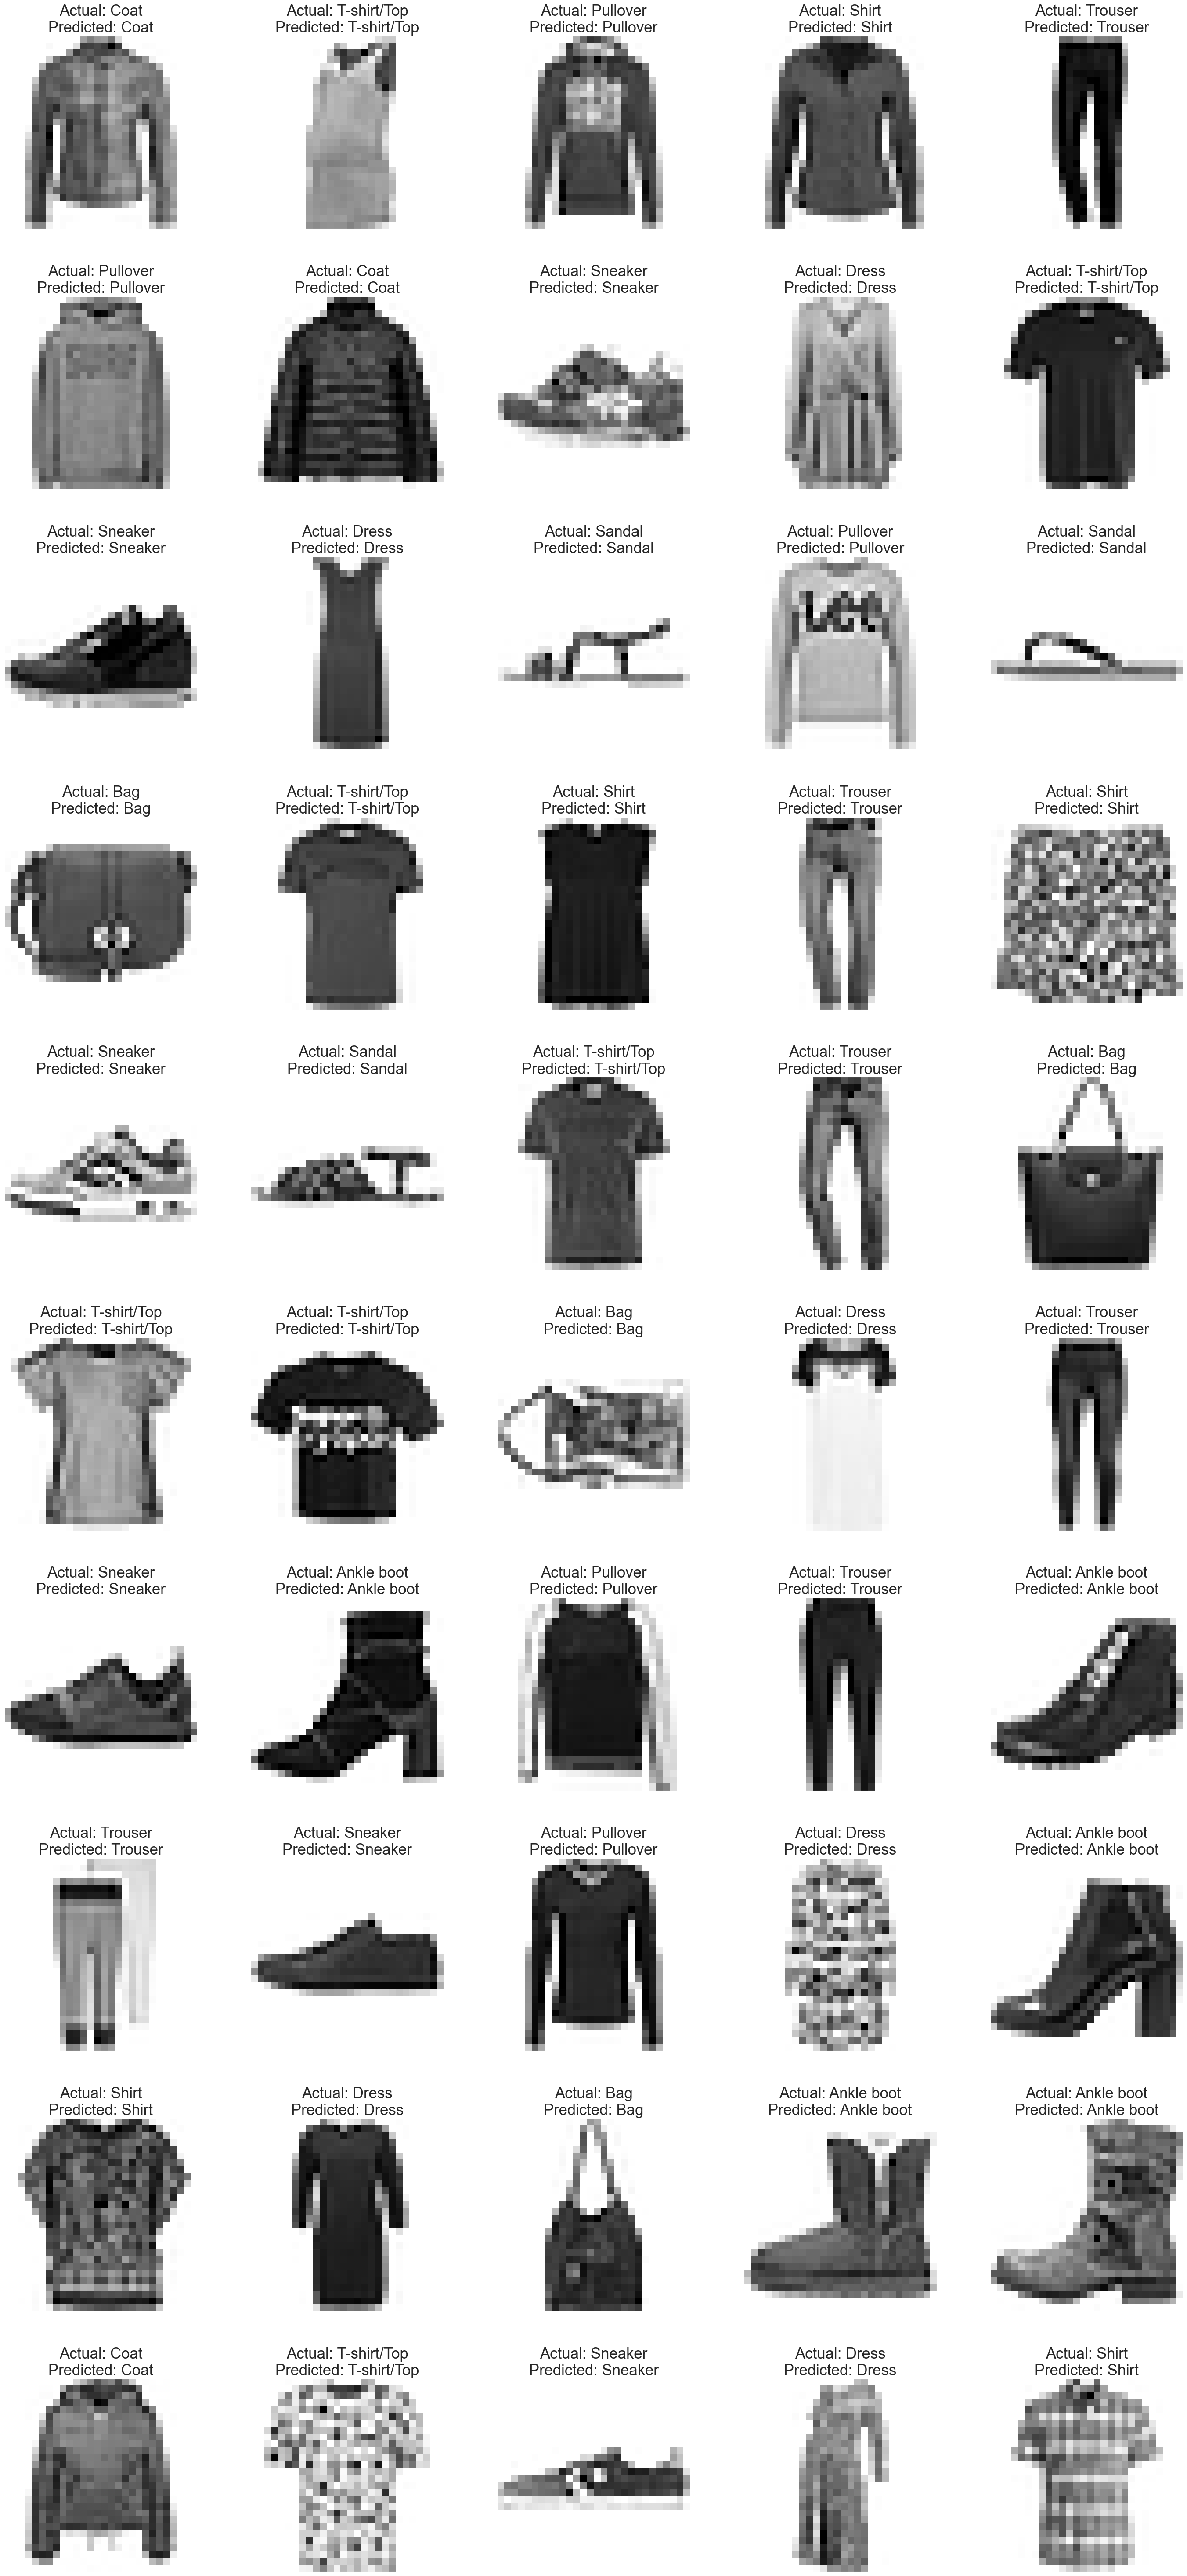

In [52]:
#CORRECT CLASSIFICATIONS

plt.figure(figsize=(35, 75))
plt.subplots_adjust(hspace=0.35)

counter = 1

while True:

    if counter == 51:
        break

    index = random.randint(1, 10000)

    if y_pred[index] == y_test[index]:

        plt.subplot(10, 5, counter)

        a=plt.gca()
        plt.imshow(x_test[index], cmap='binary')
        plt.title(f"Actual: {y_test[index]}\nPredicted: {y_pred[index]}")
        a.title.set_size(25)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        counter += 1

plt.show()

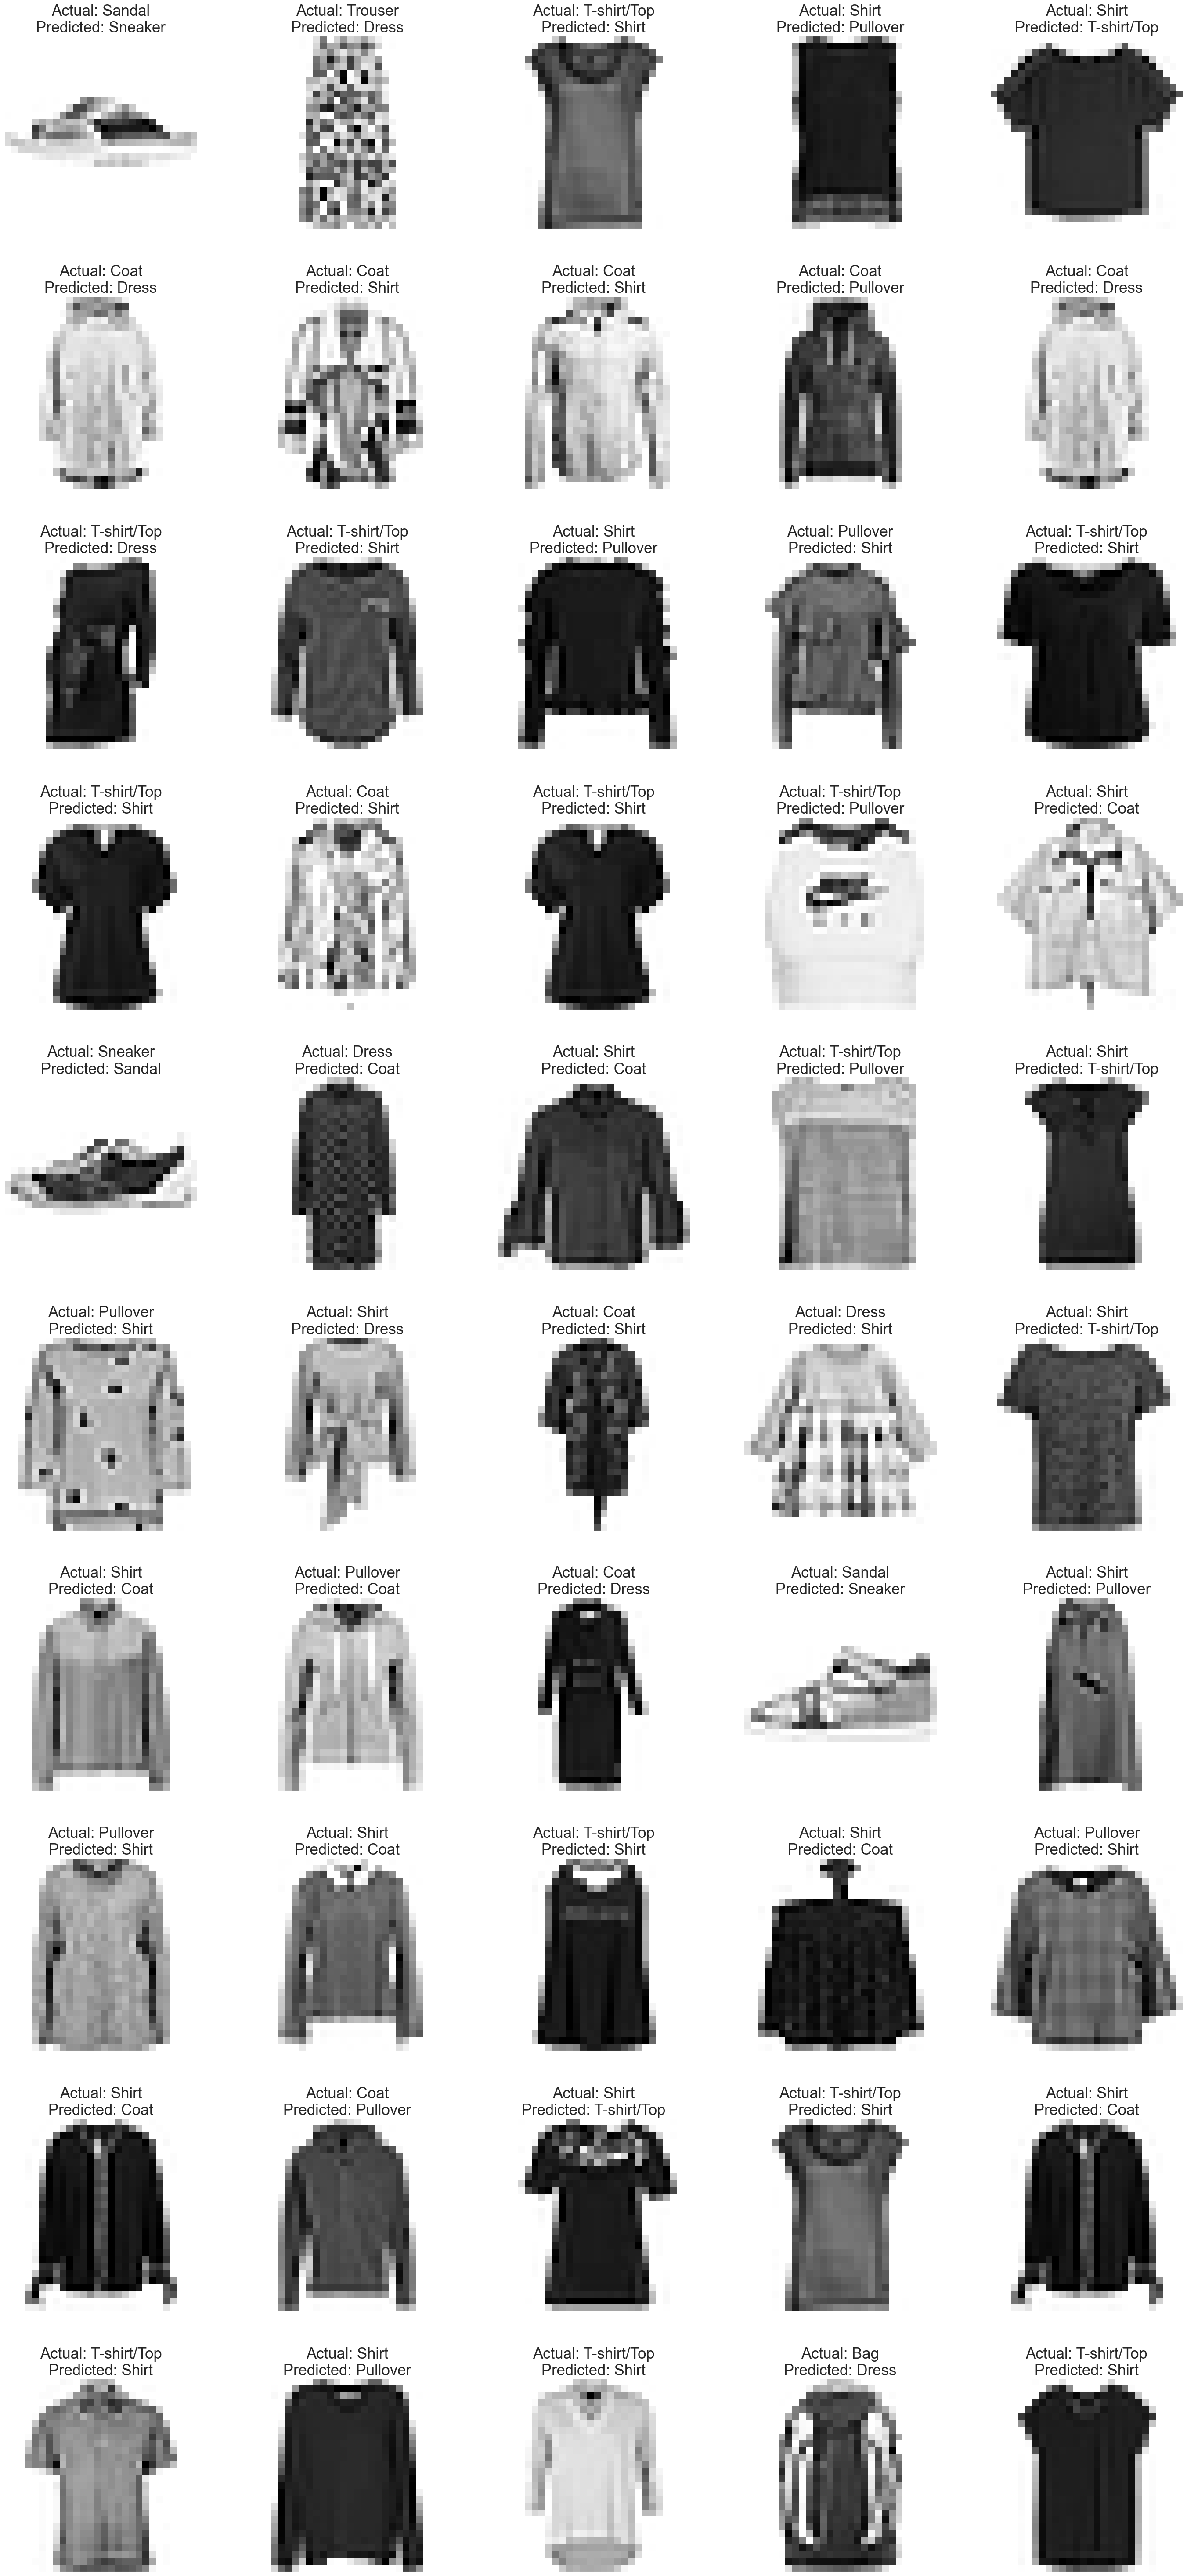

In [53]:
#INCORRECT CLASSFICATIONS

plt.figure(figsize=(35, 75))
plt.subplots_adjust(hspace=0.35)

counter = 1

while True:

    if counter == 51:
        break

    index = random.randint(1, 10000)

    if y_pred[index] != y_test[index]:

        plt.subplot(10, 5, counter)

        a=plt.gca()
        plt.imshow(x_test[index], cmap='binary')
        plt.title(f"Actual: {y_test[index]}\nPredicted: {y_pred[index]}")
        a.title.set_size(25)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        counter += 1

plt.show()